In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style='darkgrid')

In [3]:
df = pd.read_csv('../data/interim/cleaned_dataset.csv')

Общая информация о данных:

In [4]:
df.head()

,YEARS_BIRTH,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,YEARS_EMPLOYED,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,CNT_FAM_MEMBERS,CNT_CHILDREN,NAME_FAMILY_STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,BAD_CLIENT
0,32.868574,M,436565.0,Working,12.435574,Other Occupations,Higher education,2,0,Civil marriage,Yes,Yes,Rented apartment,No,Yes,No,0
1,58.793815,M,115180.0,Working,3.104787,Security staff,Secondary / secondary special,2,0,Married,Yes,Yes,House / apartment,No,No,No,0
2,52.321403,F,265080.0,Commercial associate,8.353354,Sales staff,Secondary / secondary special,1,0,Single / not married,No,Yes,House / apartment,Yes,No,Yes,0
3,61.504343,F,283695.0,Pensioner,-0.002738,Unemployed,Higher education,1,0,Separated,No,Yes,House / apartment,No,No,No,0
4,46.193967,M,266667.0,Working,2.105450,Accountants,Higher education,2,0,Married,Yes,Yes,House / apartment,Yes,Yes,Yes,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEARS_BIRTH          9728 non-null   float64
 1   CODE_GENDER          9728 non-null   object 
 2   AMT_INCOME_TOTAL     9728 non-null   float64
 3   NAME_INCOME_TYPE     9728 non-null   object 
 4   YEARS_EMPLOYED       9728 non-null   float64
 5   OCCUPATION_TYPE      9728 non-null   object 
 6   NAME_EDUCATION_TYPE  9728 non-null   object 
 7   CNT_FAM_MEMBERS      9728 non-null   int64  
 8   CNT_CHILDREN         9728 non-null   int64  
 9   NAME_FAMILY_STATUS   9728 non-null   object 
 10  FLAG_OWN_CAR         9728 non-null   object 
 11  FLAG_OWN_REALTY      9728 non-null   object 
 12  NAME_HOUSING_TYPE    9728 non-null   object 
 13  FLAG_PHONE           9728 non-null   object 
 14  FLAG_WORK_PHONE      9728 non-null   object 
 15  FLAG_EMAIL           9728 non-null   o

Распределение объектов по классам:

<AxesSubplot:xlabel='BAD_CLIENT', ylabel='count'>

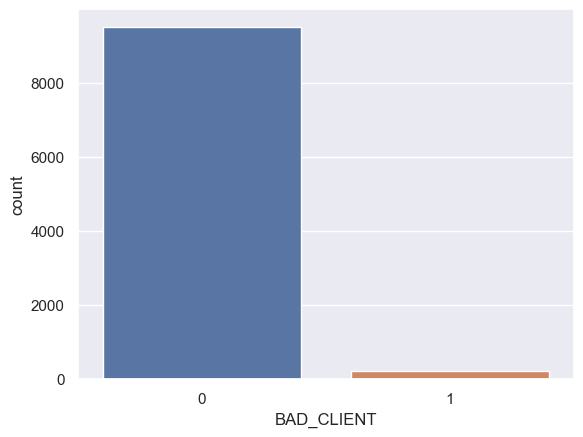

In [6]:
sns.countplot(x=df['BAD_CLIENT'])

In [7]:
df['BAD_CLIENT'].mean()

0.02251233552631579

Описание категориальных и числовых признаков:

In [8]:
cat_vars = [col for col in df.columns.values[:-1] if df[col].dtype == 'object']
num_vars = [col for col in df.columns.values[:-1] if df[col].dtype != 'object']

In [9]:
cat_vars

['CODE_GENDER',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_HOUSING_TYPE',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_EMAIL']

In [10]:
num_vars

['YEARS_BIRTH',
 'AMT_INCOME_TOTAL',
 'YEARS_EMPLOYED',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN']

In [11]:
df[cat_vars].describe()

,CODE_GENDER,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL
count,9728,9728,9728,9728,9728,9728,9728,9728,9728,9728,9728
unique,2,5,20,5,5,2,2,6,2,2,2
top,F,Working,Laborers,Secondary / secondary special,Married,No,Yes,House / apartment,No,No,No
freq,6336,4970,1727,6775,6544,6153,6533,8702,6931,7614,8877


In [12]:
df[num_vars].describe()

,YEARS_BIRTH,AMT_INCOME_TOTAL,YEARS_EMPLOYED,CNT_FAM_MEMBERS,CNT_CHILDREN
count,9728.000000,9.728000e+03,9728.000000,9728.000000,9728.000000
mean,43.782107,1.802284e+05,5.666087,2.182977,0.423006
std,11.625195,9.956238e+04,6.346279,0.933058,0.767271
min,20.504186,2.463100e+04,-0.002738,1.000000,0.000000
25%,34.053403,1.156130e+05,0.930204,2.000000,0.000000
50%,42.730515,1.582105e+05,3.761884,2.000000,0.000000
75%,53.565097,2.199510e+05,8.195925,3.000000,1.000000
max,68.863837,1.627692e+06,43.020733,20.000000,19.000000


Распределения категориальных признаков:

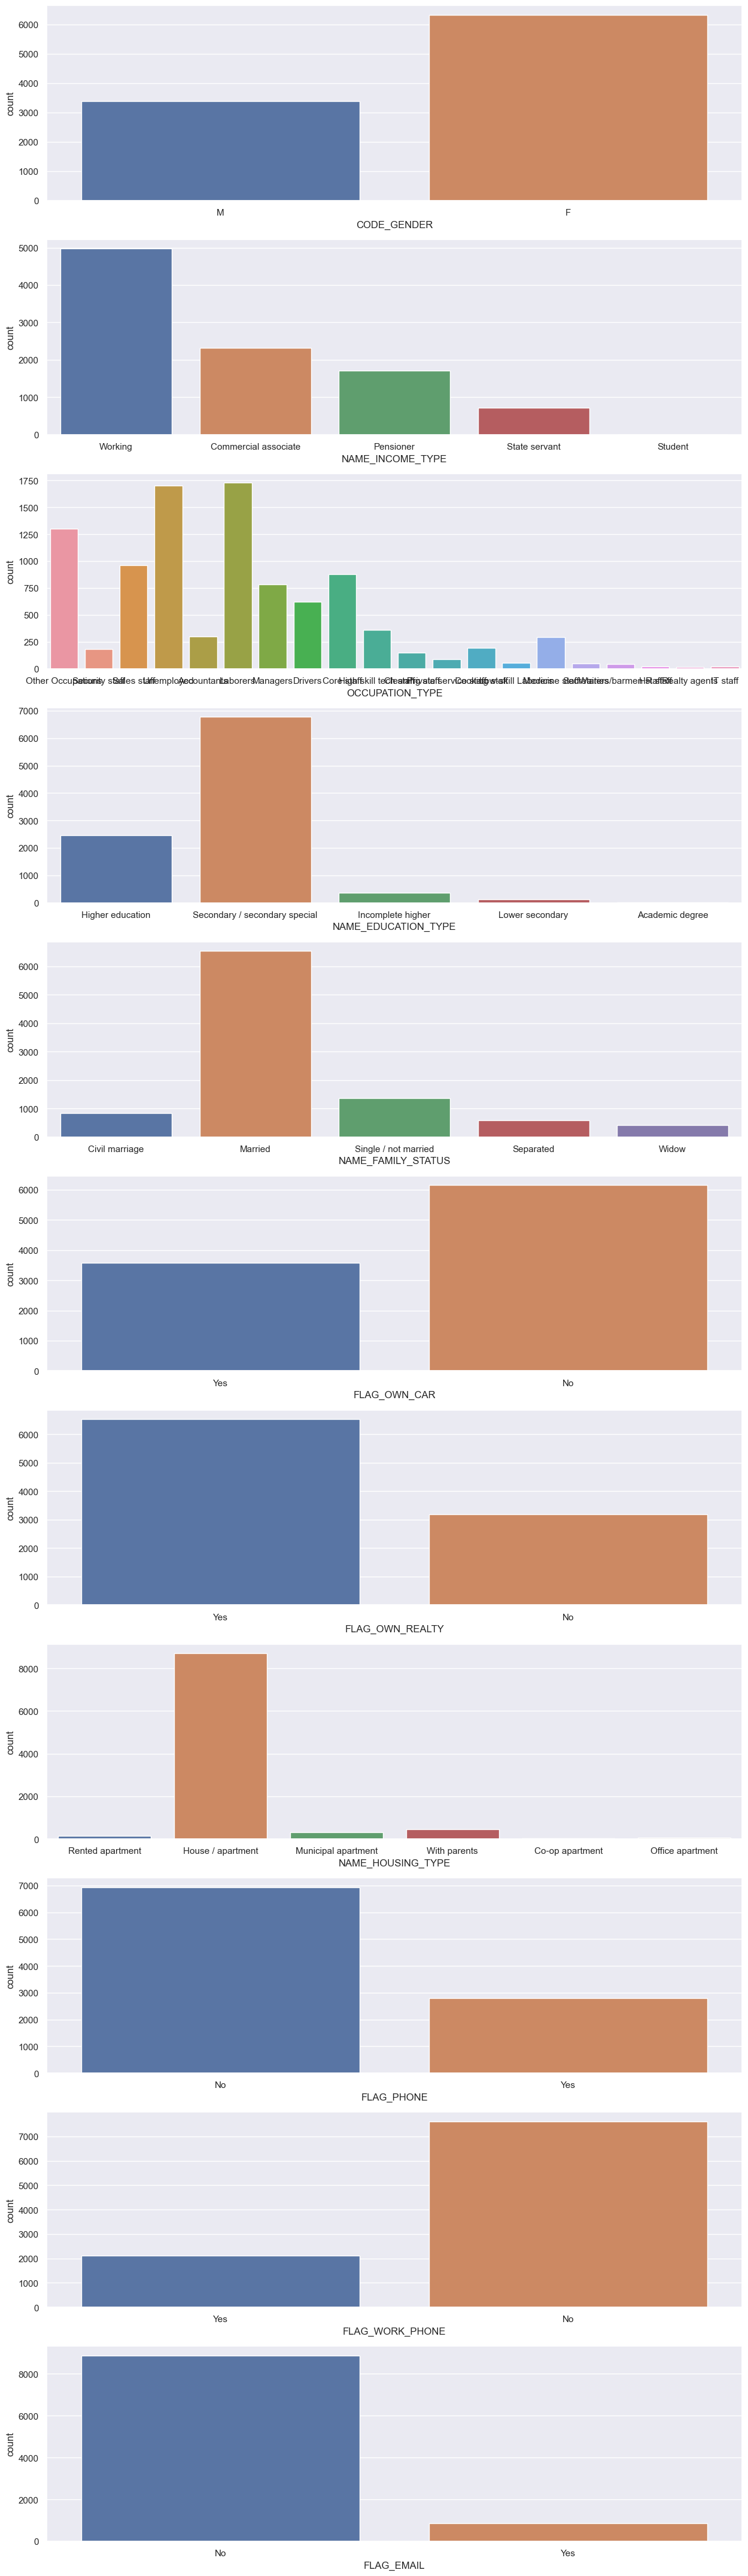

In [13]:
fig, axs = plt.subplots(len(cat_vars), figsize = (15, 5 * len(cat_vars)))
for i, var in enumerate(cat_vars):
    sns.countplot(x=df[var], ax=axs[i])

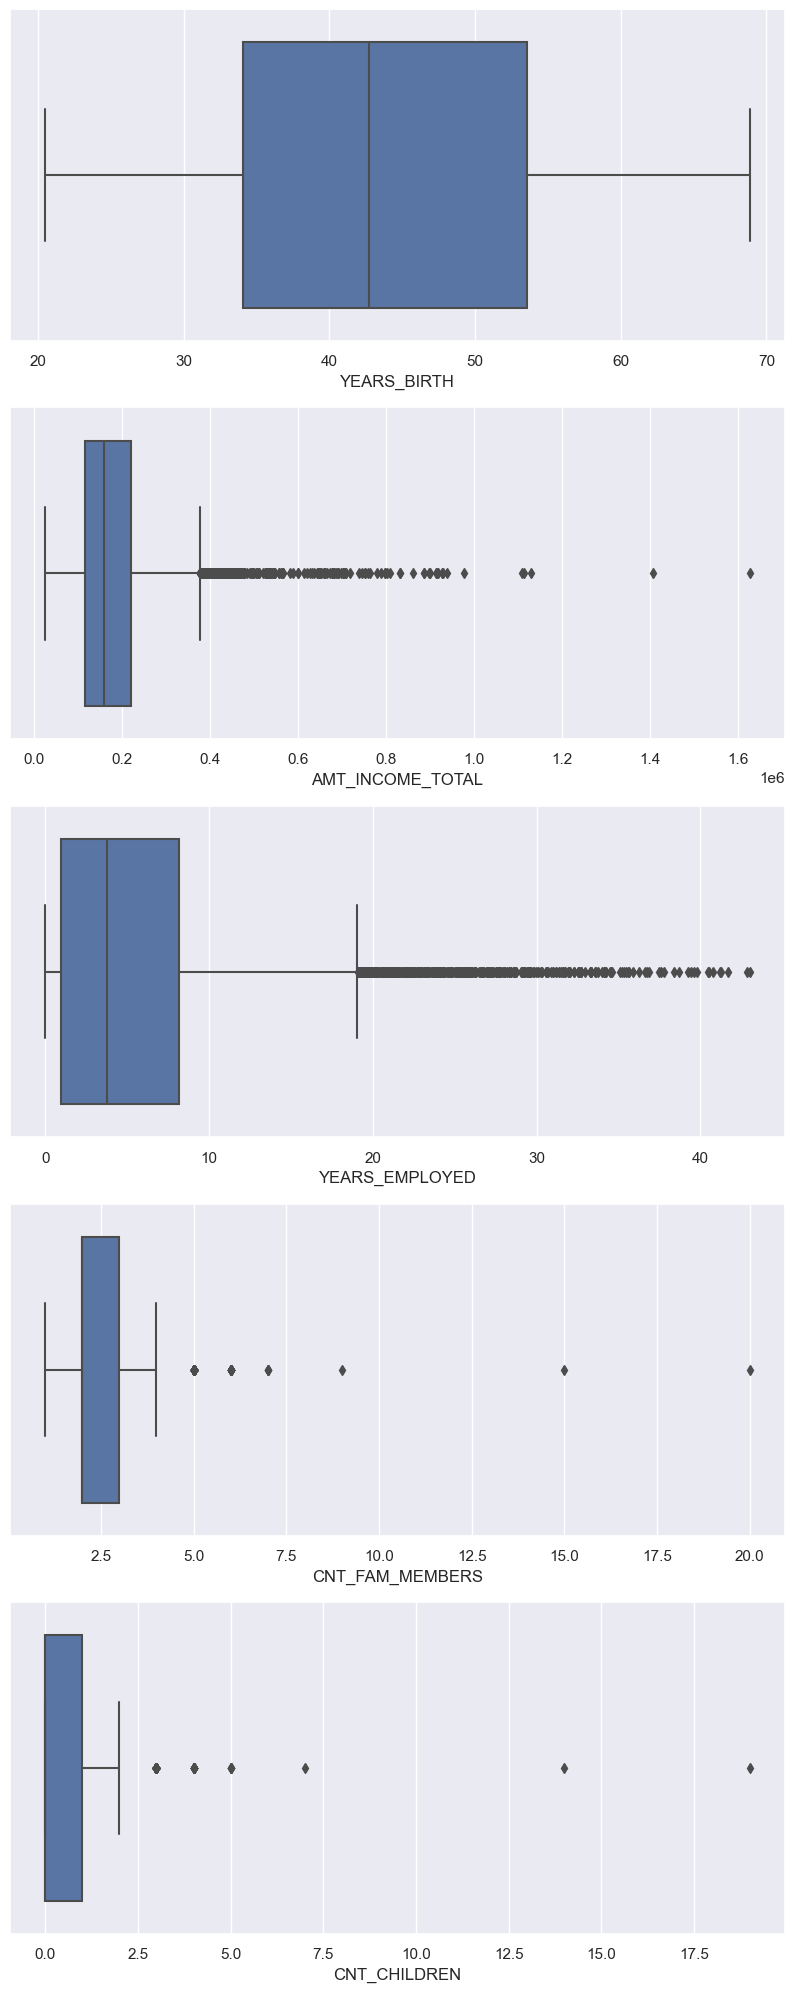

In [14]:
fig, axs = plt.subplots(len(num_vars), figsize = (10, 5 * len(num_vars)))
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])

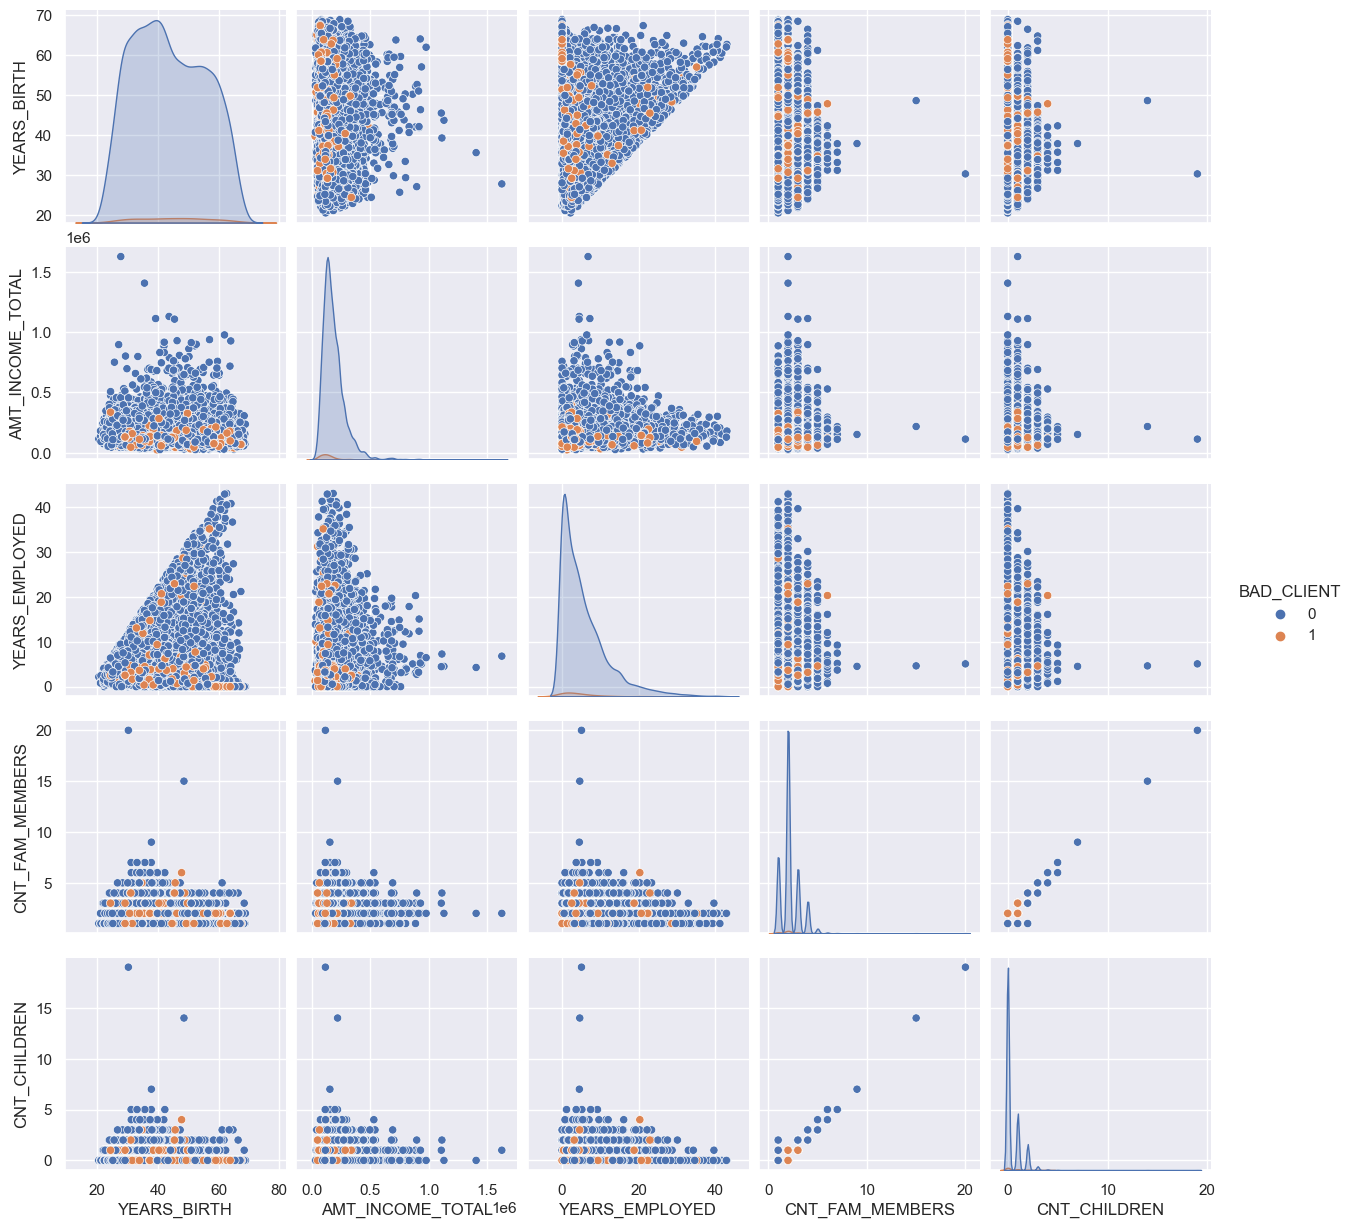

In [15]:
sns.pairplot(data=df, x_vars=num_vars, y_vars=num_vars, hue='BAD_CLIENT')

Распределение объектов по классам в зависисмости от значений категоиальных признаков:

In [16]:
for var in cat_vars:
    temp_df = df.groupby(var)['BAD_CLIENT'].agg(['count', 'mean'])
    display(temp_df)

,count,mean
CODE_GENDER,,
F,6336,0.020676
M,3392,0.025943


,count,mean
NAME_INCOME_TYPE,,
Commercial associate,2316,0.025907
Pensioner,1715,0.029155
State servant,724,0.022099
Student,3,0.000000
Working,4970,0.018712


,count,mean
OCCUPATION_TYPE,,
Accountants,300,0.023333
Cleaning staff,146,0.020548
Cooking staff,193,0.015544
Core staff,879,0.035267
Drivers,623,0.016051
HR staff,22,0.000000
High skill tech staff,358,0.025140
IT staff,18,0.055556
Laborers,1727,0.022003


,count,mean
NAME_EDUCATION_TYPE,,
Academic degree,6,0.000000
Higher education,2462,0.025589
Incomplete higher,371,0.029650
Lower secondary,114,0.052632
Secondary / secondary special,6775,0.020517


,count,mean
NAME_FAMILY_STATUS,,
Civil marriage,838,0.009547
Married,6544,0.022005
Separated,574,0.031359
Single / not married,1362,0.027166
Widow,410,0.029268


,count,mean
FLAG_OWN_CAR,,
No,6153,0.023241
Yes,3575,0.021259


,count,mean
FLAG_OWN_REALTY,,
No,3195,0.028169
Yes,6533,0.019746


,count,mean
NAME_HOUSING_TYPE,,
Co-op apartment,34,0.058824
House / apartment,8702,0.021719
Municipal apartment,323,0.049536
Office apartment,77,0.038961
Rented apartment,144,0.027778
With parents,448,0.011161


,count,mean
FLAG_PHONE,,
No,6931,0.020632
Yes,2797,0.027172


,count,mean
FLAG_WORK_PHONE,,
No,7614,0.022065
Yes,2114,0.024125


,count,mean
FLAG_EMAIL,,
No,8877,0.022192
Yes,851,0.025852
